# NPS and Analysis for Make School 2017 Summer Program


### Instructions: https://docs.google.com/document/d/11v_d1bkFbTM4N3WU6JAbdR_9_eUChrN32-mdQ9zKaOw/preview


### HBR NPS: https://hbr.org/2003/12/the-one-number-you-need-to-grow 

"Retention rates provide, in many industries, a valuable link to profitability, but their relationship to growth is tenuous. That’s because they basically track customer defections—the degree to which a bucket is emptying rather filling up "

"'How likely is it that you would recommend [company X] to a friend or colleague?' ranked first or second in 11 of the 14 cases studies. And in two of the three other cases, “would recommend” ranked so close behind the top two predictors that the surveys would be nearly as accurate by relying on results of this single question."



## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read csv and peek the data
df = pd.read_csv('SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv')
df.head(10)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


## Getting familiar with the data in question

In [2]:
# How many rows vs columns do we have? 
df.shape

(1453, 6)

In [3]:
# Lots of raw data, what a beautiful sight

df.columns

Index(['ID', 'Location', 'Track', 'Week', 'Rating (Num)', 'Schedule Pacing'], dtype='object')

In [4]:
# 'Rating (Num)' has a space in it and too many characters, let's rename it something simpler
df.rename(columns={'Rating (Num)':'Rating'}, inplace=True)

In [5]:
# Look at the count of each rating
df['Rating'].value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
0            2
1            2
2            2
Name: Rating, dtype: int64

In [6]:
# Eliminate #ERROR! rows from the df because, upon inspection, they have no useful data / were left blank
df = df[df['Rating'] != '#ERROR!']

In [7]:
# Store loc of Rating as integers
df_rating = df.loc[:, 'Rating'].astype(int)
df_rating

0        3
1        4
2        4
3        4
4        4
        ..
1448    10
1449     8
1450    10
1451     1
1452     8
Name: Rating, Length: 1450, dtype: int64

# Calculate NPS

In [8]:
# Categorize each rating from our formula. Promoters are 9 & 10, Passives 7 & 8, Detractors 0 - 6
# I assume ratings of 0 would have been ratings of 1

def categorize_rating(rating):
    
    if rating > 10 or rating < 0:
        raise ValueError('Value Out of Bounds')
    elif rating >= 9:
        return 'Promoter'
    elif rating >= 7:
        return 'Passive'
    else:
        return 'Detractor'

In [9]:
# apply the categorize function to each rating and store the output in a new column
# create 'Category' column in df

df['Category'] = df_rating.apply(categorize_rating)
df.head(10)

,ID,Location,Track,Week,Rating,Schedule Pacing,Category
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
5,23,Redwood City,Apps,Week 1,5,Just right,Detractor
6,28,Los Angeles,Apps,Week 7,5,Just right,Detractor
7,65,San Francisco,Apps,Week 1,5,A little too slow,Detractor
8,101,Santa Clara,Apps,Week 1,5,A little too slow,Detractor
9,124,Santa Clara,Apps,Week 1,5,Just right,Detractor


In [10]:
# parse new column: Categories, calculate NPS

def calculate_nps(categories):
    promoters = categories.value_counts()['Promoter']
    passives = categories.value_counts()['Passive']
    detractors = categories.value_counts()['Detractor']

    # the last week has no detractors. Instead of blank, make it 0
    print(promoters, passives, detractors)
    return (promoters - detractors) / (promoters+passives+detractors)*100

overall_nps = calculate_nps(df['Category'])

f"NPS: {overall_nps}"

760 569 121


'NPS: 44.06896551724138'

In [11]:
# this version returns empty categories with a 0 instead of nothing at all

def calc_nps(categories):
    prom = categories.eq('Promoter').astype(int).sum()
    pas = categories.eq('Passive').astype(int).sum()
    det = categories.eq('Detractor').astype(int).sum()
#     print(prom, pas, det)
    return (prom-det)/(prom+pas+det)*100
# df['CAR'].eq('BMW').astype(int).groupby(df['DATE']).sum()

calc_nps(df['Category'])

44.06896551724138

# Diving into the data

Here, I explore some important questions to find out more about trends in the data.

How many more promoters are there than detractors across our 2017 data?
Which track boasts the best promoter-to-detractor ratio?
Does the student experience get better the longer that they are enrolled at the Summer Academy?
Does student satisfaction vary by location?
What are things we could find here that could “help the business”?
What sorts of information does this dataset contain?
What kinds of questions might we be able to answer with this data?
What kinds of questions can’t we answer with this data?
What sorts of information might be actionable?
How can you present your findings in a way that non-technical employees can understand and use to make decisions?

## Question 1: How many more promoters are there than detractors across our 2017 data?

In [12]:
# Let's make a pie chart to help visualize the spread of each Category relative to the whole

BINS = [-np.inf, 0.00, np.inf]
LABELS = ["Promoter", "Passive", "Detractor"]
colors = ['Green', 'Yellowgreen', 'pink']

In [13]:
cat_df = df["Category"].value_counts()

(-1.1089888454347638,
 1.1224835377140603,
 -1.1146208968133489,
 1.2018786623859277)

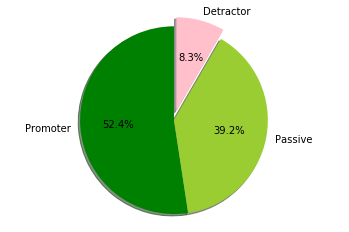

In [14]:
explode = (0, 0, 0.1)
plt.pie(cat_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode = explode)

fig = plt.gcf()

plt.axis('equal')

In [15]:
promoters = df['Category'].value_counts()['Promoter']
detractors = df['Category'].value_counts()['Detractor']
promoters, detractors

(760, 121)

In [16]:
f'We have {promoters - detractors} more promoters than detractors.'

'We have 639 more promoters than detractors.'

## Question 2: Which track boasts the best promoter-to-detractor ratio?

In [17]:
# Take a quick peek at the numbers of the data we're interested in
# Like how many people were in each of the tracks

df['Track'].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

In [18]:
# and how many liked dislike or were neutral
pd.crosstab(df['Track'], df['Category'])

Category,Detractor,Passive,Promoter
Track,,,
Apps,78,355,438
"Apps, Explorer",24,109,91
Games,9,66,133
"Games, Explorer",0,12,31
VR,2,12,46


Text(0.5, 1, 'Correlation between Track and Category')

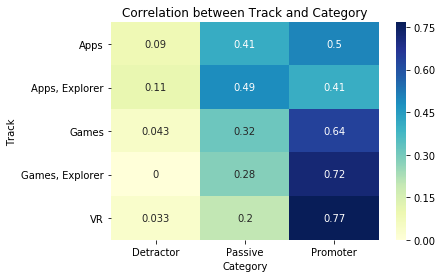

In [19]:
m = sns.heatmap(pd.crosstab(df['Track'], df['Category'], normalize='index'), cmap="YlGnBu", annot=True)
plt.title('Correlation between Track and Category')

Overall Games,Explorer Track wins with the unicorn score of 0% Detractors and 72% Promoters. 
VR Track has the highest promoters with 77% Promoters and only 3% Detractors.

## Question 3: Does the student experience get better the longer that they are enrolled at the Summer Academy? 

In [20]:
# I'll use graphs to visualize the trend of student experience (NPS) over the weeks of the program
# Let's peek at the relationship between the two within our df
pd.crosstab(df['Week'], df['Category'])

Category,Detractor,Passive,Promoter
Week,,,
Week 1,28,131,129
Week 2,23,116,137
Week 3,20,86,135
Week 4,19,74,100
Week 5,15,67,97
Week 6,8,59,77
Week 7,8,34,78
Week 8,0,2,7


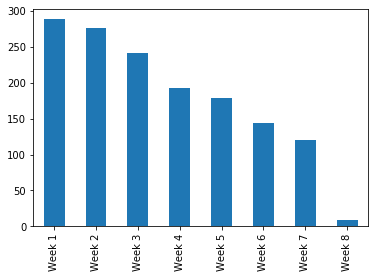

In [21]:
# It's important to acknowledge the steep decline in available data over time

df['Week'].value_counts().plot(kind='bar')

In [22]:
# Make a df of the weeks grouped by category

cat_weeks = df.groupby('Category')['Week']
cat_weeks.value_counts()

Category   Week  
Detractor  Week 1     28
           Week 2     23
           Week 3     20
           Week 4     19
           Week 5     15
           Week 6      8
           Week 7      8
Passive    Week 1    131
           Week 2    116
           Week 3     86
           Week 4     74
           Week 5     67
           Week 6     59
           Week 7     34
           Week 8      2
Promoter   Week 2    137
           Week 3    135
           Week 1    129
           Week 4    100
           Week 5     97
           Week 7     78
           Week 6     77
           Week 8      7
Name: Week, dtype: int64

In [23]:
# Then calculate nps for each week
weekly_nps = calculate_nps(cat_weeks)
weekly_nps

Week
Week 2    137
Week 3    135
Week 1    129
Week 4    100
Week 5     97
Week 7     78
Week 6     77
Week 8      7
Name: Week, dtype: int64 Week
Week 1    131
Week 2    116
Week 3     86
Week 4     74
Week 5     67
Week 6     59
Week 7     34
Week 8      2
Name: Week, dtype: int64 Week
Week 1    28
Week 2    23
Week 3    20
Week 4    19
Week 5    15
Week 6     8
Week 7     8
Name: Week, dtype: int64


Week
Week 1    35.069444
Week 2    41.304348
Week 3    47.717842
Week 4    41.968912
Week 5    45.810056
Week 6    47.916667
Week 7    58.333333
Week 8          NaN
Name: Week, dtype: float64

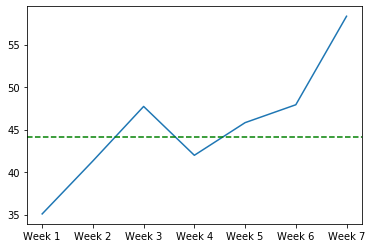

In [24]:
# and graph it in blue along with the overall nps in red
fig, ax = plt.subplots()
ax.plot(weekly_nps)
ax.axhline(overall_nps, color='green', linestyle='--')

Overall the trend is positive. We knew this from the NPS score being a positive ~44. From the graph we can see the general trend over each week. 

Note: This result could be because the only people who wrote reviews over time were the people who enjoyed the program.. Survivorship Bias. This correlates with the amount of recorded data significantly dropping off over time as the ratings increase.

## Question 4: Does student satisfaction vary by location?

Instead of rating per week, we look at ratings relative to location 

In [25]:
# Amount in each Category per location
pd.crosstab(df['Location'], df['Category'])

Category,Detractor,Passive,Promoter
Location,,,
Atlanta,0,9,24
Beijing,0,25,53
Chicago,4,29,37
Hong Kong,3,7,1
Los Angeles,5,33,68
New York City,35,136,159
Oakland,2,18,27
Redwood City,5,23,30
San Francisco,31,135,194


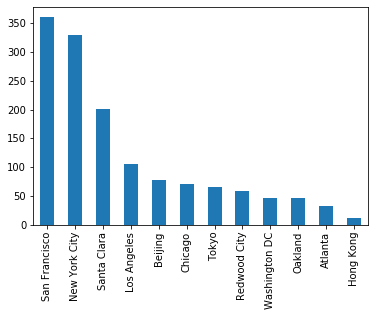

In [26]:
# Histogram of amount of people per location
df['Location'].value_counts().plot(kind='bar')

Location
San Francisco    194
New York City    159
Santa Clara       93
Los Angeles       68
Beijing           53
Chicago           37
Tokyo             33
Redwood City      30
Oakland           27
Atlanta           24
Washington DC     20
Hong Kong          1
Name: Location, dtype: int64 Location
New York City    136
San Francisco    135
Santa Clara       95
Los Angeles       33
Chicago           29
Beijing           25
Redwood City      23
Tokyo             23
Washington DC     21
Oakland           18
Atlanta            9
Hong Kong          7
Name: Location, dtype: int64 Location
New York City    35
San Francisco    31
Santa Clara      13
Tokyo             9
Washington DC     6
Los Angeles       5
Redwood City      5
Chicago           4
Hong Kong         3
Oakland           2
Name: Location, dtype: int64


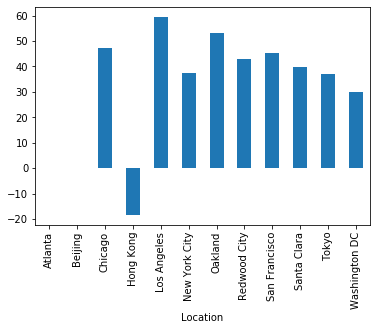

In [27]:
# bar plot of nps at each location, beijing atlanta have nan values
cat_locs = df.groupby('Category')['Location']
location_nps = calculate_nps(cat_locs)
location_nps.plot(kind='bar')

In [28]:
nps_beijing = (53 + 0) / (53 + 25 + 0)
nps_beijing * 100

67.94871794871796

In [29]:
location_nps

Location
Atlanta                NaN
Beijing                NaN
Chicago          47.142857
Hong Kong       -18.181818
Los Angeles      59.433962
New York City    37.575758
Oakland          53.191489
Redwood City     43.103448
San Francisco    45.277778
Santa Clara      39.800995
Tokyo            36.923077
Washington DC    29.787234
Name: Location, dtype: float64

As we can see from the data, location NPS varies greatly. HongKong struggles to find more than 1 promoter, however Atlanta sees no Detractors at all. From both graphs above we can see that these values are based on the number of people in attandance which varies more than the NPS data in fact.

Overall, however, the NPS scores look balanced based on location with a few outliers.

## Question 5: What are things we could find here that could “help the business”?

Having data drop off over time does not have to be the case. For more reliable results this should be a high priority. Excluding Week 8, by half way through the program we see just over half the responses.

Let's see what is common within each Category

### What can we learn about Location relative to Track? 

In [30]:
pd.crosstab(df['Track'], df['Location'])

Location,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC
Track,,,,,,,,,,,,
Apps,15,76,52,1,75,194,39,58,155,111,65,30
"Apps, Explorer",18,2,18,10,0,49,8,0,77,25,0,17
Games,0,0,0,0,31,59,0,0,68,50,0,0
"Games, Explorer",0,0,0,0,0,28,0,0,0,15,0,0
VR,0,0,0,0,0,0,0,0,60,0,0,0


### If people do change tracks, what does the trend look like? 

In [31]:
pd.crosstab(df['Track'], df['Week'])

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Track,,,,,,,,
Apps,183,176,142,105,101,88,72,4
"Apps, Explorer",42,40,38,34,31,23,16,0
Games,35,29,36,33,31,21,19,4
"Games, Explorer",6,6,7,7,6,6,5,0
VR,10,10,10,10,7,5,7,1


Looks consistent, little to no changes

### What was pacing feedback like for each category? Track?

In [32]:
pd.crosstab(df['Schedule Pacing'], df['Category'])

Category,Detractor,Passive,Promoter
Schedule Pacing,,,
A little too fast,25,140,124
A little too slow,19,41,40
Just right,65,378,591
Way too fast,10,9,4
Way too slow,2,1,1


This tells us nothing about the Detractors as most of them said it was too fast, and obviously the Promoters said it was Just Right. 

However, we do learn that the biggest deviation was "A little too fast"

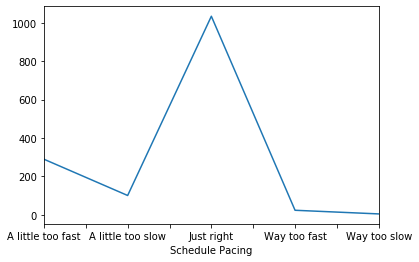

In [33]:
df.groupby('Schedule Pacing')['Rating'].count().plot()

### NPS of 44 is a good score. In order to improve we could do more to cater  to international students, as ratings from Hong Kong students is by far the worst. 

We want more people to recommend to ppl in each city

## Let's explore why there was a dip in ratings between Week 3 and 4

In [34]:
pd.crosstab(df['Week'], df['Schedule Pacing'])

Schedule Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Week,,,,,
Week 1,64,39,179,5,1
Week 2,80,27,161,7,1
Week 3,49,14,175,2,1
Week 4,30,8,151,3,1
Week 5,29,6,143,1,0
Week 6,21,2,119,2,0
Week 7,15,2,101,2,0
Week 8,1,2,5,1,0


### As we can see from the feedback, the decline in ratings from Week 3 - 4 is reflected in the schedule pacing and we can get a better understanding of what improvement to make.

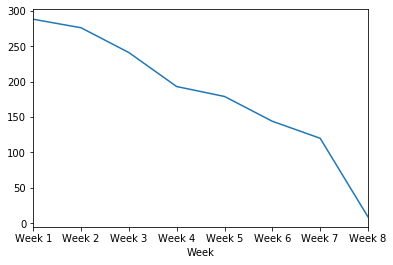

In [35]:
df.groupby('Week')['Schedule Pacing'].count().plot()

### Above, we get an idea of the quantity of feedback forms each week
## Below, I graph the pace for the whole program for each week to see if we can get any clues

In [36]:
weekly_paces = lambda pace: df.loc[df['Schedule Pacing'] == pace].groupby('Week')['Schedule Pacing'].count()/df.groupby('Week')['Schedule Pacing'].count()

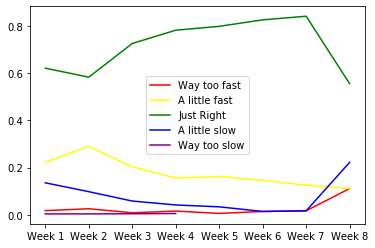

In [37]:
fig, ax = plt.subplots()
ax.plot(weekly_paces('Way too fast'), label='Way too fast', c='Red')
ax.plot(weekly_paces('A little too fast'), label='A little fast', c='Yellow')
ax.plot(weekly_paces('Just right'), label='Just Right', c='Green')
ax.plot(weekly_paces('A little too slow'), label='A little slow', c='Blue')
ax.plot(weekly_paces('Way too slow'), label='Way too slow', c='Purple')


plt.legend()

### Between weeks 3 and 4 we can see the 'A little fast' rating drop off while 'just right' increases. 

### This may seem off.. let's look at the NPS scores for each week:

In [38]:
# Convert weeks to integers by splitting at the space and taking just the number at the end
df['Week'] = df.apply(lambda row: int(row['Week'].strip().split(' ')[-1]), axis=1)

In [39]:
week3_nps = calc_nps(df[df['Week']==3]['Category'])
week3_nps

47.71784232365145

In [40]:
week4_nps = calc_nps(df[df['Week']==4]['Category'])
week4_nps

41.968911917098445

### Here we can clearly see the massive dip in NPS score. Maybe we can find out which track this came from if any. Let's graph the NPS per track per week & the pace for each track to get a better idea where these figures are coming from. 

In [41]:

week_tracks = df.groupby(['Week', 'Track'])['Category']
week_tracks_nps = week_tracks.apply(calc_nps)

week_tracks_nps.head(8)

Week  Track          
1     Apps               36.612022
      Apps, Explorer     16.666667
      Games              31.428571
      Games, Explorer    66.666667
      VR                 70.000000
2     Apps               36.931818
      Apps, Explorer     32.500000
      Games              72.413793
Name: Category, dtype: float64

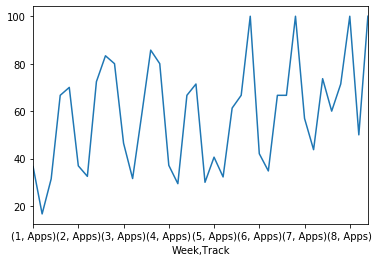

In [42]:
week_tracks.value_counts()
week_tracks_nps.plot()

In [43]:
fig, ax = plt.subplots()
ax.plot(week_track_nps.groupby(['Track']=='Apps')['hi', label='Apps', c='Red')
# ax.plot(week4_apps_week_nps('A little too fast'), label='A little fast', c='Yellow')
# ax.plot(week4_apps_week_nps('Just right'), label='Just Right', c='Green')
# ax.plot(week4_apps_week_nps('A little too slow'), label='A little slow', c='Blue')
# ax.plot(week4_apps_week_nps('Way too slow'), label='Way too slow', c='Purple')

plt.legend()

SyntaxError: invalid syntax (<ipython-input-43-0af7dc8edac1>, line 2)